# **Duplicate Question Detection Using Machine Learning**

## Objective:
The goal of this project is to identify whether two questions are semantically similar.  
We will use **Natural Language Processing (NLP)** and **Deep Learning** techniques to classify duplicate questions.  

## Dataset:
- The dataset contains pairs of questions labeled as `duplicate (1)` or `not duplicate (0)`.  
- We will clean and preprocess text before building a model.

## Workflow:
1. **Exploratory Data Analysis (EDA)**
2. **Text Preprocessing**
3. **Model Training**
4. **Evaluation**
5. **Final Predictions**


In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## **Step 01: Exploratory Data Analysis (EDA)**
To understand the dataset, we will:
- Check for missing values
- Analyze the text columns (question1 and question2) using word
clouds, sentence length, common words, etc.
- Visualize class distribution
- Analyze common words and sentence lengths

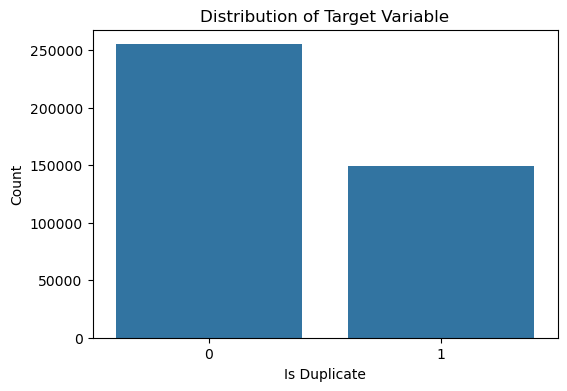

Missing values in Train Data:
id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


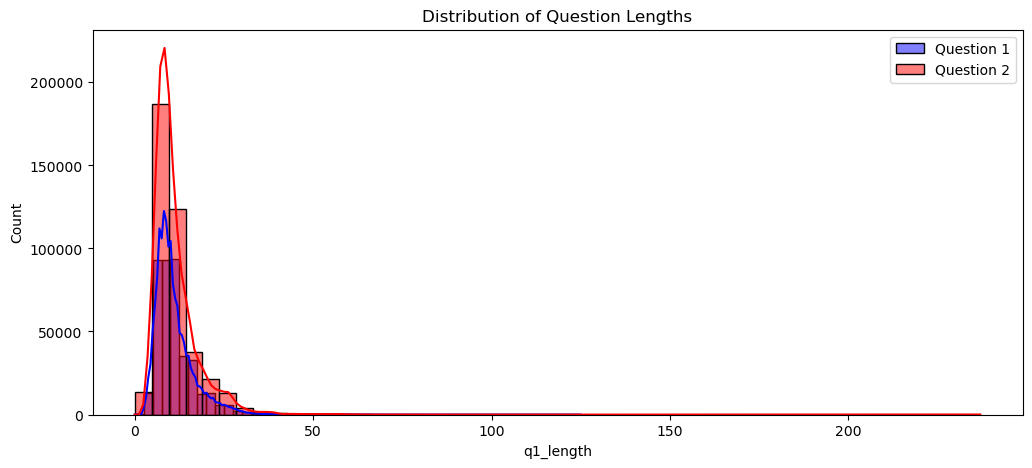

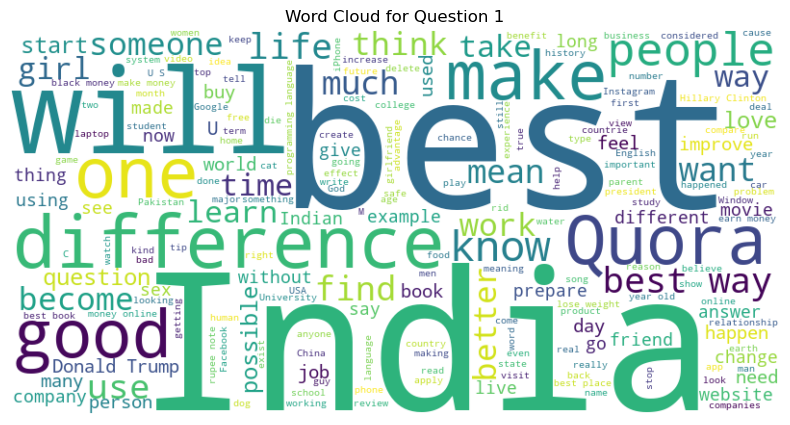

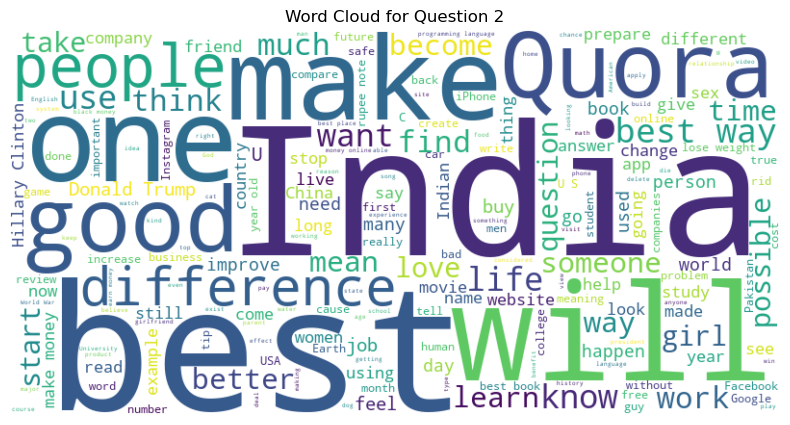

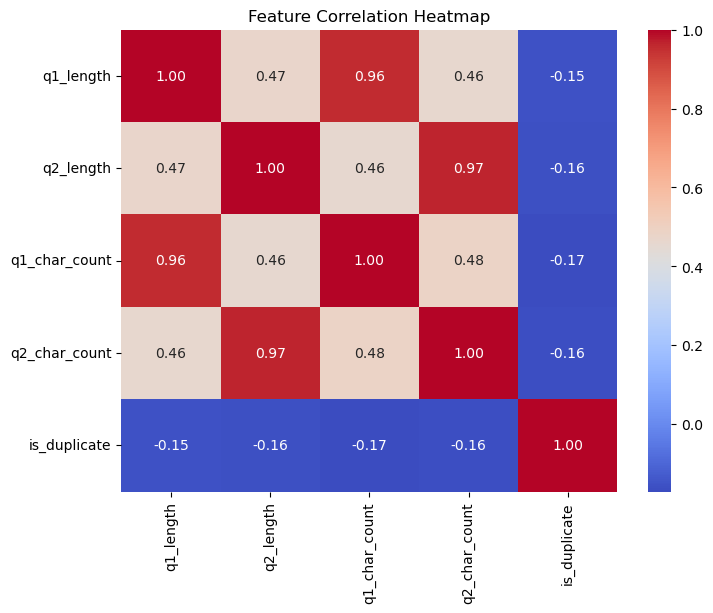

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Try importing the wordcloud library
try:
    from wordcloud import WordCloud
except ImportError:
    print("wordcloud module not found")

# load the train dataset
train_df = pd.read_csv('train.csv')

## Exploratory Data Analysis (EDA)

#Visualizing Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='is_duplicate', data=train_df)
plt.title('Distribution of Target Variable')
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.show()
# This plot helps us check the class imbalance in the dataset.

#  Checking for Missing Values
print("Missing values in Train Data:")
print(train_df.isnull().sum())

#  Handling Missing Data
train_df = train_df.fillna('')

##Feature Engineering

#Creating New Features (Question Lengths & Character Counts)
#These features will help understand text length variations in duplicate vs. non-duplicate ques.
train_df['q1_length'] = train_df['question1'].apply(lambda x: len(str(x).split()))
train_df['q2_length'] = train_df['question2'].apply(lambda x: len(str(x).split()))
train_df['q1_char_count'] = train_df['question1'].apply(lambda x: len(str(x)))
train_df['q2_char_count'] = train_df['question2'].apply(lambda x: len(str(x)))

# Visualizing Question Lengths Distribution
plt.figure(figsize=(12,5))
sns.histplot(train_df['q1_length'], bins=50, kde=True, color='blue', label='Question 1')
sns.histplot(train_df['q2_length'], bins=50, kde=True, color='red', label='Question 2')
plt.legend()
plt.title('Distribution of Question Lengths')
plt.show()
# This histogram helps analyze the distribution of question lengths.

## Word Cloud for Common Words
if 'WordCloud' in globals():
    def generate_wordcloud(text, title):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()

    generate_wordcloud(' '.join(train_df['question1'].astype(str)), "Word Cloud for Question 1")
    generate_wordcloud(' '.join(train_df['question2'].astype(str)), "Word Cloud for Question 2")
else:
    print("Skipping Word Cloud generation as 'wordcloud' module is missing.")
    
# Word clouds help visualize frequently occurring words in the dataset.

## Correlation Analysis

# Compute the correlation matrix
corr_matrix = train_df[['q1_length', 'q2_length', 'q1_char_count', 'q2_char_count', 'is_duplicate']].corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

#The heatmap shows how different features correlate with each other and the target variable.


# Key Insights from Exploratory Data Analysis (EDA)
### 1️. Distribution of the Target Variable:
- The dataset appears **imbalanced**, meaning there are more non-duplicate question pairs than duplicates.

### 2️. Missing Values:
- Checked for missing values and replaced them with empty strings to avoid errors in text processing.

### 3. Feature Engineering:
- Extracted **word counts** and **character counts** for both questions.
- This helps analyze whether similar questions tend to have similar lengths.

### 4️. Data Visualization:
- **Histograms:** Show the distribution of word counts in questions.
- **Word Clouds:** Help us see frequently occurring words in both question columns.
- **Heatmap:** Displays correlation between numerical features and the target variable.